Load necessary modules

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Generate artificial training data

In [18]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

Train the kNN classifier

In [19]:
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X[:,[0,1]], X[:,2])

KNeighborsClassifier(n_neighbors=3)

Plot the predictor

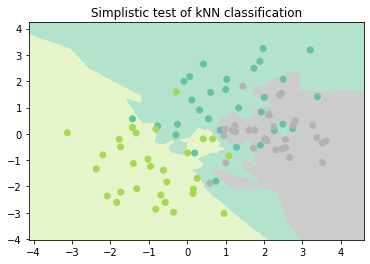

In [20]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
plt.title("Simplistic test of kNN classification")
plt.show()